MOUNT DRIVE AND IMPORT


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
from sklearn import preprocessing
import pandas as pd
import copy
import numpy as np
import json




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CONFIG FILE


In [ ]:
config = {
    'pre_path': '/content/drive/MyDrive/TS/dataset/',
    'dataset' : 'NAB/',
    'pre_filename_path':'data/realKnownCause/',
    'TS_filename' : 'nyc_taxi.csv',
    'labels_path': 'labels/combined_labels.json',
    'anomaly_type' : 'point',
    'value_column':'value',
    'anomaly_column':'anomaly',
    'timestamp_column':'timestamp',
    'train_size' : 0.5,
    'test_size' : 0.4,
    'val_size' : 0.1,
    'window_length' : 35,
    'prediction_time' : 1,

    
}
config['pre_path']


x = '''



config['


']


'''

LOAD TS ALONG WITH LABELS and targets

In [ ]:
df = pd.read_csv(config['pre_path'] + config['dataset'] + config['pre_filename_path'] + config['TS_filename'])
df[config['anomaly_column']] = np.zeros(df.shape[0], dtype=int)
with open(config['pre_path'] + config['dataset'] + config['labels_path']) as f:
  labels_all = json.load(f)
  labels_all = labels_all[0]
for anomaly in labels_all['realKnownCause/'+config['TS_filename']]:
  df.loc[df[config['timestamp_column']] == anomaly.split('.')[0], config['anomaly_column']] = 1
df = df[[config['value_column'], config['anomaly_column']]]

from sklearn import preprocessing
import pandas as pd
import copy
import numpy as np
import json



df_original = copy.deepcopy(df)


df = pd.concat([pd.DataFrame(df[:-1]['value']),
               pd.DataFrame(df[1:][config['value_column']]).rename(columns= {config['value_column']: 'target'}).reset_index().drop(labels=['index'],  axis=1),
               
               pd.DataFrame(df[1:]['anomaly']).reset_index().drop(labels=['index'],  axis=1)],
               axis = 1
              )         



df = df.astype(float)

standard_scaler = preprocessing.MinMaxScaler()
df['value'] = standard_scaler.fit_transform(np.array(df['value']).reshape(-1, 1))
df['target'] = standard_scaler.fit_transform(np.array(df['target']).reshape(-1, 1))

df

,value,target,anomaly
0,0.276506,0.207175,0.0
1,0.207175,0.158259,0.0
2,0.158259,0.118605,0.0
3,0.118605,0.097272,0.0
4,0.097272,0.073107,0.0
...,...,...,...
10314,0.605042,0.629309,0.0
10315,0.629309,0.656128,0.0
10316,0.656128,0.696650,0.0
10317,0.696650,0.678328,0.0


In [ ]:
def unroll (data, sequence_length = 30):
  """
  creates arrays of subsequent numbers with sequence_length, with stride = 1
  """
  result = []
  for index in range(len(data) - sequence_length):
      result.append(data[index: index + sequence_length])
  return np.asarray(result)

df_unroll_original = unroll(df, config['window_length'])

df_unroll = copy.deepcopy(df_unroll_original)
#df_unroll = df_unroll[:,:,0]

df_unroll.shape

(10284, 35, 3)

In [ ]:
df_unroll

array([[[0.27650616, 0.20717548, 0.        ],
        [0.20717548, 0.1582587 , 0.        ],
        [0.1582587 , 0.11860471, 0.        ],
        ...,
        [0.41389165, 0.38288806, 0.        ],
        [0.38288806, 0.43877108, 0.        ],
        [0.43877108, 0.4980224 , 0.        ]],

       [[0.20717548, 0.1582587 , 0.        ],
        [0.1582587 , 0.11860471, 0.        ],
        [0.11860471, 0.09727219, 0.        ],
        ...,
        [0.38288806, 0.43877108, 0.        ],
        [0.43877108, 0.4980224 , 0.        ],
        [0.4980224 , 0.58582766, 0.        ]],

       [[0.1582587 , 0.11860471, 0.        ],
        [0.11860471, 0.09727219, 0.        ],
        [0.09727219, 0.07310725, 0.        ],
        ...,
        [0.43877108, 0.4980224 , 0.        ],
        [0.4980224 , 0.58582766, 0.        ],
        [0.58582766, 0.70402409, 0.        ]],

       ...,

       [[0.13271581, 0.09377631, 0.        ],
        [0.09377631, 0.08474317, 0.        ],
        [0.08474317, 0

In [ ]:
2 :: 1
from sklearn import preprocessing
import pandas as pd
import copy
import numpy as np
import json

standard_scaler = preprocessing.MinMaxScaler()

for i in range(len(df_unroll)):
  to_scale = []
  for j in range(len(df_unroll[i])):
    to_scale.append(df_unroll[i][j][0])
  to_scale.append(df_unroll[i][j][1])
  to_scale = np.array(to_scale)
  to_scale = to_scale.reshape(-1, 1)
  to_scale = standard_scaler.fit_transform(to_scale)
  for j in range(len(df_unroll[i])):
    df_unroll[i][j][0] = to_scale[j][0]
  df_unroll[i][j][1] = to_scale[j][0]


df_unroll



SyntaxError: ignored

In [ ]:
2 :: 1
dfcp = copy.deepcopy(df_unroll)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

train = []
train_ind = []
val = []
val_ind = []
test = []
test_ind = []

# Assuming X and y are your feature matrix and target vector
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf

for train_index, val_index in kf.split(dfcp):
  train_index, test_index = train_test_split(train_index, test_size=0.5, random_state=40)
  X_train, X_val, X_test = dfcp[train_index], dfcp[val_index], dfcp[test_index]
  train.append(X_train)
  train_ind.append(train_index)
  val.append(X_val)
  val_ind.append(val_index)
  test.append(X_test)
  test_ind.append(test_index)





SyntaxError: ignored

In [ ]:
dfcp = copy.deepcopy(df_unroll)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

train = []
train_ind = []
val = []
val_ind = []
test = []
test_ind = []

# Assuming X and y are your feature matrix and target vector
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf


#train_index, test_index = train_test_split(train_index, test_size=0.5, random_state=40)
X_train, X_val, X_test = dfcp[0:4500], dfcp[4500:6000], dfcp[6000:]

In [ ]:
X_test.shape

(4284, 35, 3)

In [ ]:
config['fsize'] = 30
config['lr'] = 0.0020

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras import models
#from keras import backend as K
from scipy.linalg import norm

fsize = config['fsize']
window_size = X_train.shape[1]
n_features = 1 #self.Df.x_train.shape[2] #hehe #trzeba przemodelowac df_unroll z (8092, 30, 3) na (8092, (30, 1, 1))
model = Sequential()
model.add(layers.Conv1D(64, fsize, activation='relu', input_shape=(window_size, n_features), padding='same'))
model.add(layers.MaxPooling1D((4), padding='same'))
model.add(layers.Conv1D(32, fsize, activation='relu', padding='same'))
model.add(layers.MaxPooling1D((4), padding='same'))
model.add(layers.Conv1D(16, fsize, activation='relu', padding='same'))
model.add(layers.MaxPooling1D((4), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(n_features, activation='sigmoid'))

model.compile(tf.keras.optimizers.RMSprop(
    learning_rate=config['lr'],
),
    loss='mse'
)

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 35, 64)            1984      
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 9, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 9, 32)             61472     
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 3, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_53 (Conv1D)          (None, 3, 16)             15376     
                                                                 
 max_pooling1d_53 (MaxPoolin  (None, 1, 16)          

In [ ]:
#K.set_value(model.optimizer.learning_rate, self.config['lr'])
x_train = X_train[:,:,0]
y_train = X_train[:,-1, 1]
x_val = X_val[:,:,0]
y_val = X_val[:,-1, 1]
batch_size = 64 #self.config['batch_size']
epochs = 35 #self.config['epochs']
validation_data = (x_val, y_val)
#verbose = self.config['verbose']


model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=validation_data, #,
    verbose=True
)


Epoch 1/35
71/71 [==============================] - 3s 27ms/step - loss: 0.0193 - val_loss: 0.0079
Epoch 2/35
71/71 [==============================] - 2s 24ms/step - loss: 0.0060 - val_loss: 0.0131
Epoch 3/35
71/71 [==============================] - 2s 23ms/step - loss: 0.0044 - val_loss: 0.0360
Epoch 4/35
71/71 [==============================] - 2s 24ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 5/35
71/71 [==============================] - 2s 24ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 6/35
71/71 [==============================] - 3s 39ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 7/35
71/71 [==============================] - 2s 30ms/step - loss: 0.0027 - val_loss: 0.0080
Epoch 8/35
71/71 [==============================] - 2s 24ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 9/35
71/71 [==============================] - 2s 24ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 10/35
71/71 [==============================] - 2s 26ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 11/

In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.linalg import norm
from researchpy import summary_cont
y_val_pred = model.predict(X_val[:,:,0])
pred = y_val_pred
true = X_val[:,-1, 1]

residua = abs( true.reshape(len(true),1) - pred.reshape(len(pred),1) )
#residua = norm(residua, axis=1).reshape(residua.shape[0],1)

def calculate_threshold(residua, sigma_max = 10):
  residua_df = pd.DataFrame(residua)
  SD = summary_cont(residua_df)['SD'].values[0]
  threshold = None
  multiply = sigma_max
  while threshold == None:
      try:
          threshold = residua_df[residua_df[0] > multiply * SD].values.min()
      except:
          multiply -= 1
  return threshold

threshold = calculate_threshold(residua, 6)
print(threshold)

47/47 [==============================] - 0s 7ms/step


0.2792925788935901


/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


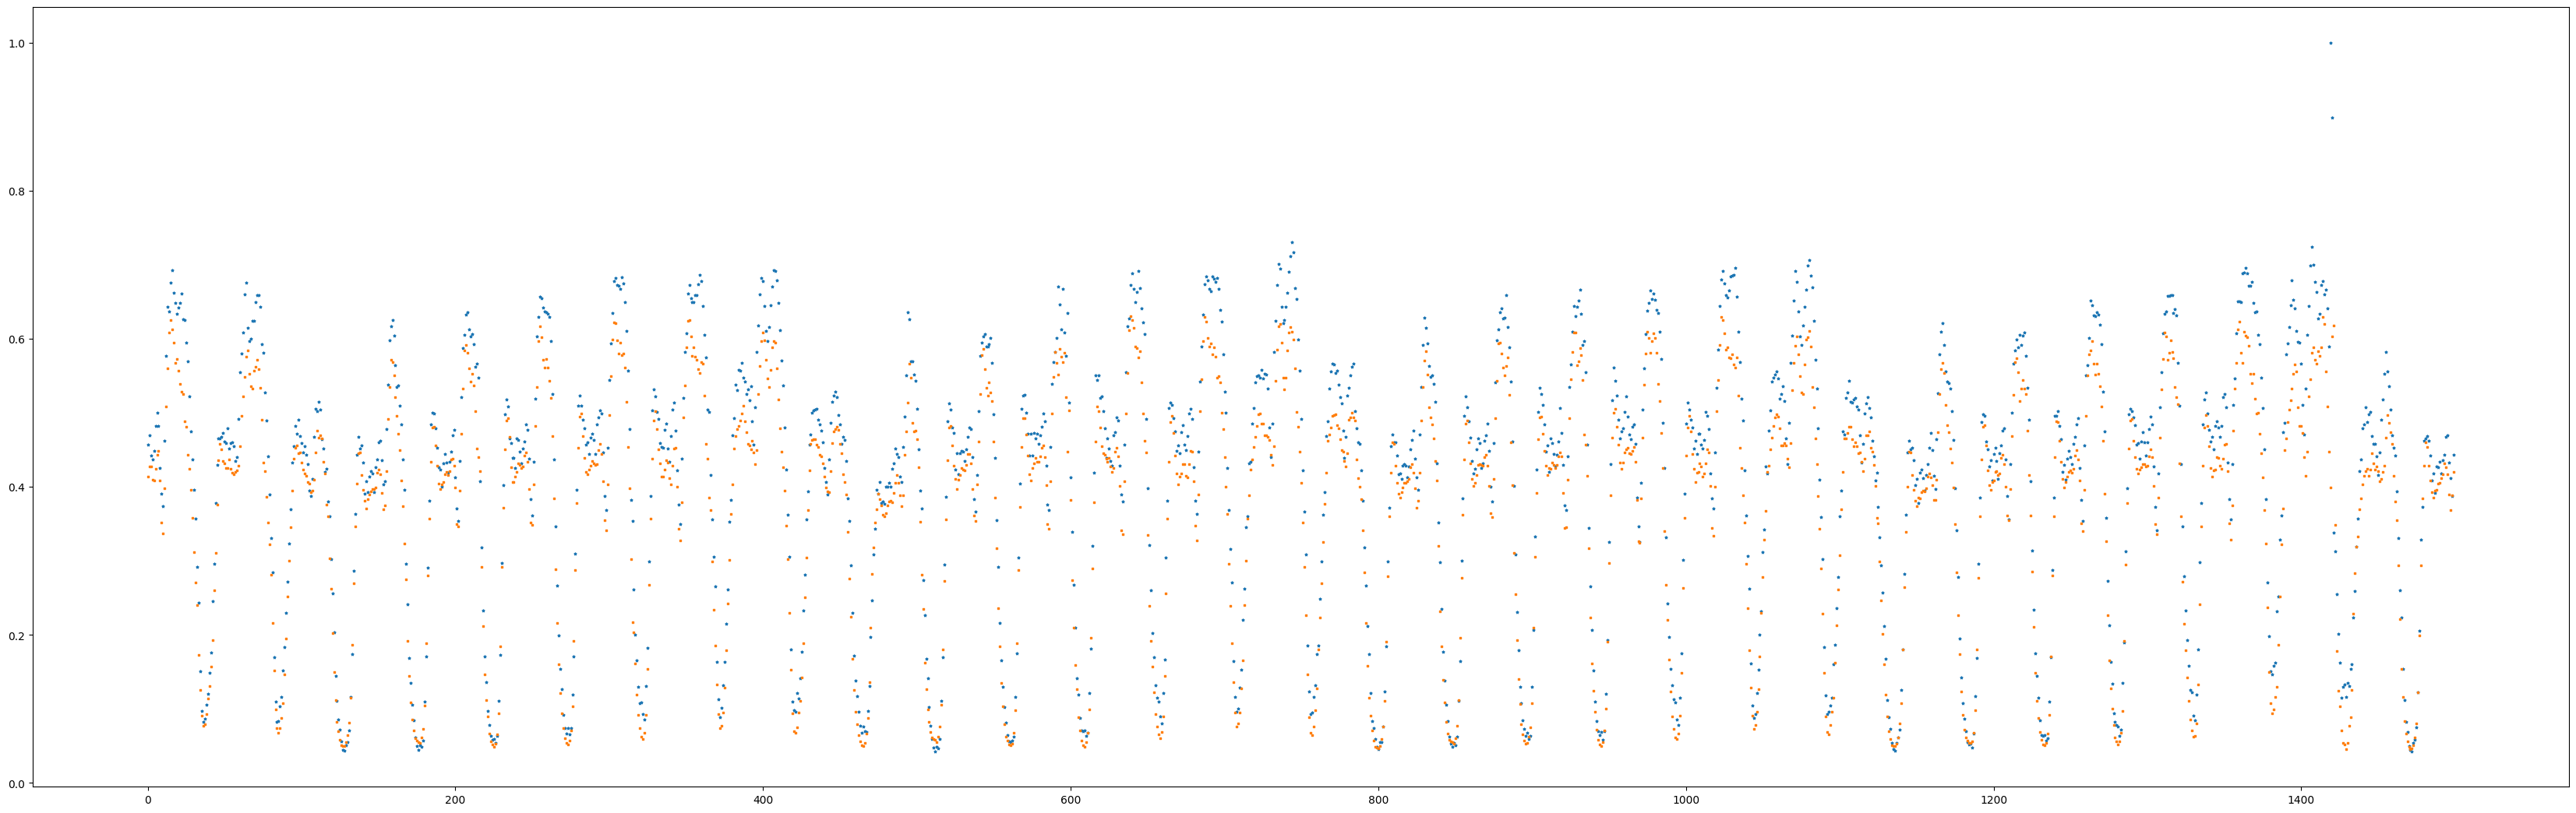

In [ ]:
plt.figure(figsize=(42,13))
plt.scatter(np.arange(len(true)),true, s=5, marker='*', label='Asterisks')
plt.scatter(np.arange(len(true)),pred, s=1, marker='s', label='square')

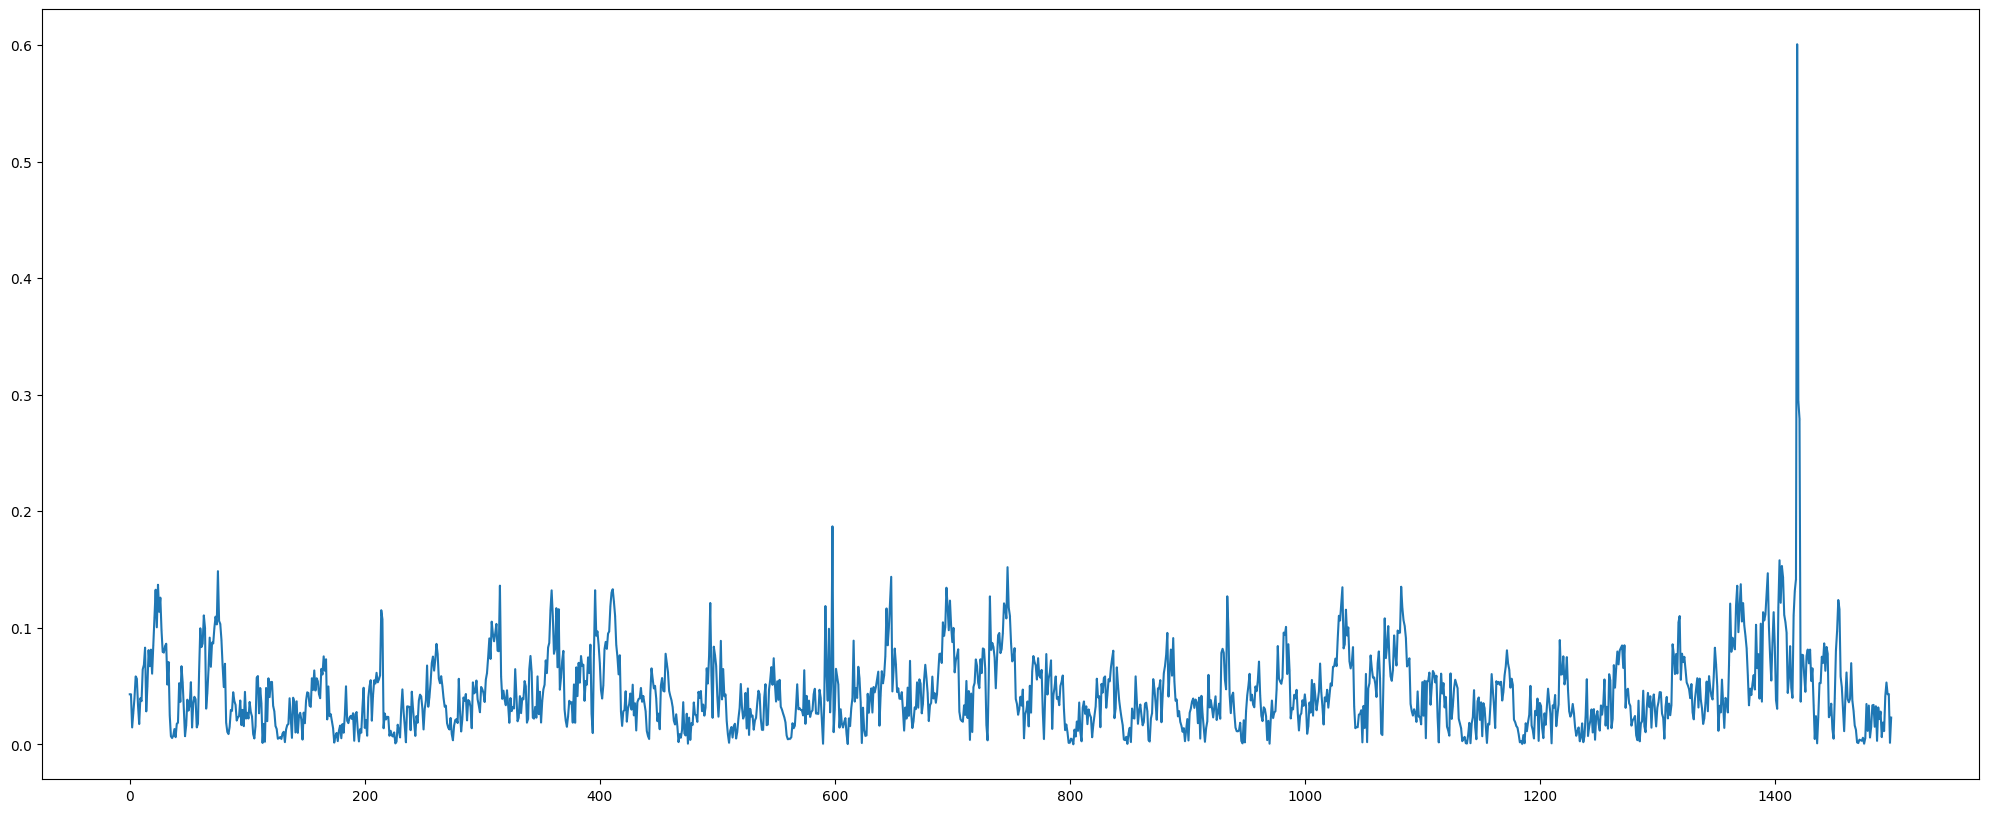

In [ ]:
plt.figure(figsize=(25,10))
# Plot the data


plt.plot(np.arange(len(true)),residua, markersize=0.05,marker='.')

In [ ]:
ret = model.predict(X_test[:,:,0])
pred = ret
true = X_test[:,-1, 1]
residua = abs( true.reshape(len(true),1) - pred.reshape(len(pred),1) )
#residua = abs(true-pred)# if mod else true-pred
#residua = norm(residua, axis=1).reshape(residua.shape[0],1)

is_anomaly = np.zeros(len(residua))
for i in range(len(is_anomaly)):
    if residua[i] > threshold:
        is_anomaly[i] = 1

from sklearn.metrics import f1_score, precision_score, recall_score

win = X_test[:,-1,-1]
sc = is_anomaly
output = dict(f1 = f1_score(win,sc),
              precision = precision_score(win,sc),
              recall = recall_score(win,sc))


134/134 [==============================] - 1s 4ms/step


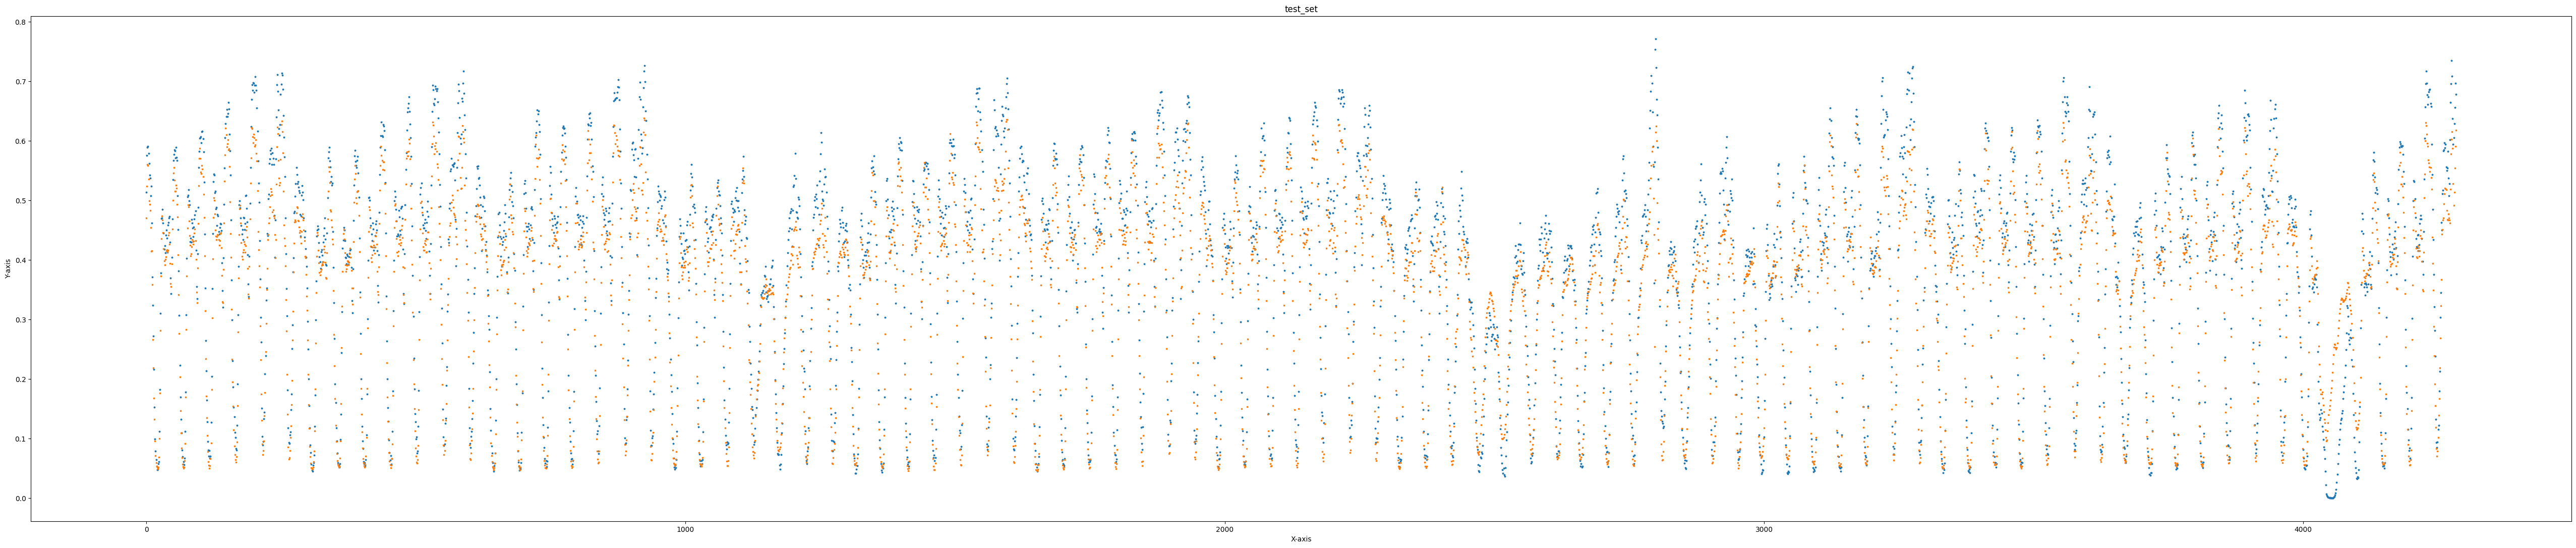

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(65,13))
#plt.figure(figsize=(42,13))
plt.scatter(np.arange(len(true)),true, s=5, marker='*', label='Asterisks')
plt.scatter(np.arange(len(true)),pred, s=1, marker='s', label='square')
# Plot the data
#plt.plot(np.arange(len(true)),true, markersize=0.15,marker='*' )
#plt.plot(np.arange(len(true)),pred, markersize=0.15, marker='s')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('test_set')

# Show the plot
plt.show()

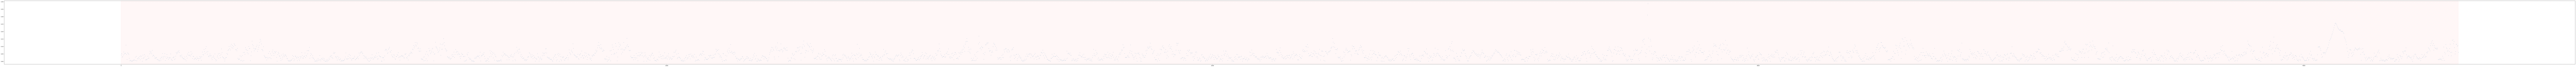

In [ ]:
fig, ax = plt.subplots(figsize=(400,10))
#plt.figure(figsize=(25,10))
# Plot the data


ax.scatter(np.arange(len(true)),residua, s=5,marker='.')

for e in np.arange(len(true)):  
  ax.axvline(x=e, color='r', linestyle='-', alpha=0.1, markersize=0.001)

In [ ]:
pred

array([[2.74576392e-04],
       [3.40506289e-04],
       [6.82231039e-04],
       ...,
       [2.25253694e-04],
       [1.20377284e-04],
       [8.01715942e-05]], dtype=float32)

In [ ]:
true

array([0.12738496, 0.36795984, 0.73889253, ..., 0.97006187, 0.61253843,
       0.64422412])

In [ ]:
win = X_test[:,-1,-1]
win

array([0., 0., 0., ..., 0., 0., 0.])

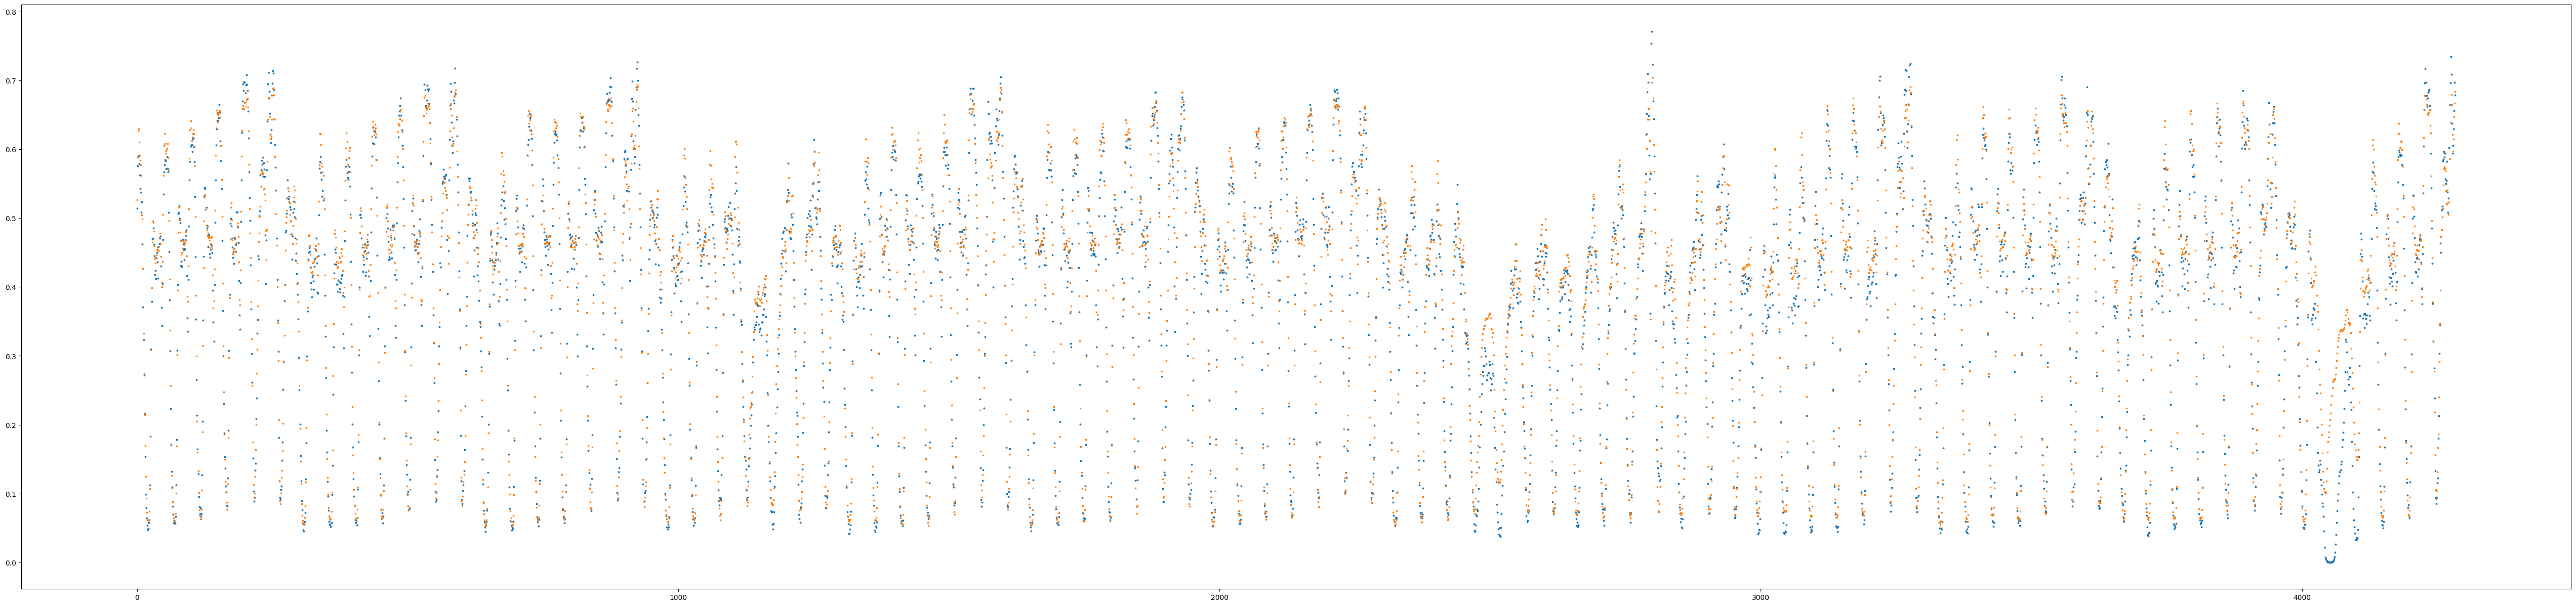

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(65,15))
# Plot the data

plt.scatter(np.arange(len(true)),true, s=5, marker='*', label='Asterisks')
plt.scatter(np.arange(len(true)),pred, s=1, marker='s', label='q')
#plt.plot(np.arange(len(true)),true, markersize=0.05,marker='.')
#plt.plot(np.arange(len(true)),pred, markersize=0.05,marker='.-')

# Set labels and title
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
#plt.title('validation_set')

# Show the plot
plt.show()

In [ ]:
arr = win
num_ones = np.count_nonzero(arr)

# Count the number of zeros
num_zeros = arr.size - num_ones

print("Number of ones:", num_ones)
print("Number of zeros:", num_zeros)

Number of ones: 3
Number of zeros: 4628


In [ ]:
residua.shape

(4631, 4631)

In [ ]:
X_train[0]

array([[9.15498575e-01, 0.00000000e+00, 1.86050000e+04],
       [9.54472934e-01, 0.00000000e+00, 1.81130000e+04],
       [9.26438746e-01, 0.00000000e+00, 1.75790000e+04],
       [8.96011396e-01, 0.00000000e+00, 1.69270000e+04],
       [8.58860399e-01, 0.00000000e+00, 1.65260000e+04],
       [8.36011396e-01, 0.00000000e+00, 1.69560000e+04],
       [8.60512821e-01, 0.00000000e+00, 1.73810000e+04],
       [8.84729345e-01, 0.00000000e+00, 1.92320000e+04],
       [9.90199430e-01, 0.00000000e+00, 1.91270000e+04],
       [9.84216524e-01, 0.00000000e+00, 1.94040000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.88120000e+04],
       [9.66267806e-01, 0.00000000e+00, 1.82530000e+04],
       [9.34415954e-01, 0.00000000e+00, 1.64970000e+04],
       [8.34358974e-01, 0.00000000e+00, 1.66810000e+04],
       [8.44843305e-01, 0.00000000e+00, 1.73340000e+04],
       [8.82051282e-01, 0.00000000e+00, 1.76740000e+04],
       [9.01424501e-01, 0.00000000e+00, 1.64690000e+04],
       [8.32763533e-01, 0.00000

In [ ]:
test_index

array([[[2.49384374e-02, 0.00000000e+00, 2.64200000e+03],
        [0.00000000e+00, 0.00000000e+00, 2.70400000e+03],
        [2.77591225e-03, 0.00000000e+00, 4.81200000e+03],
        ...,
        [7.05350347e-01, 0.00000000e+00, 2.15000000e+04],
        [8.44325050e-01, 0.00000000e+00, 2.33680000e+04],
        [9.27960600e-01, 0.00000000e+00, 9.27960600e-01]],

       [[0.00000000e+00, 0.00000000e+00, 5.03800000e+03],
        [2.12782301e-02, 0.00000000e+00, 5.87500000e+03],
        [8.55738209e-02, 0.00000000e+00, 6.91000000e+03],
        ...,
        [7.91749885e-01, 0.00000000e+00, 1.55570000e+04],
        [8.29313259e-01, 0.00000000e+00, 1.37660000e+04],
        [6.91734521e-01, 0.00000000e+00, 6.91734521e-01]],

       [[6.38635012e-01, 0.00000000e+00, 1.70500000e+04],
        [6.85793089e-01, 0.00000000e+00, 1.67950000e+04],
        [6.72002596e-01, 0.00000000e+00, 1.75470000e+04],
        ...,
        [1.17732951e-01, 0.00000000e+00, 5.27000000e+03],
        [4.87264074e-02, 0.00

In [ ]:
train_ind[1]

array([   0,    1,    2, ..., 5170, 5172, 5173])

In [ ]:
val_index.shape

(1029,)

In [ ]:
len(dfcp)

10289

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your feature matrix and target vector

# Split data into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [ ]:
to_scale[0][0]

0.4715280401576078

In [ ]:
pd.DataFrame(df[:-1])

,value,anomaly
0,10844,0
1,8127,0
2,6210,0
3,4656,0
4,3820,0
...,...,...
10314,23719,0
10315,24670,0
10316,25721,0
10317,27309,0


In [ ]:
pd.DataFrame(df[1:][config['value_column']]).reset_index().drop(labels=['index'],  axis=1)

,value
0,8127
1,6210
2,4656
3,3820
4,2873
...,...
10314,24670
10315,25721
10316,27309
10317,26591


In [ ]:
df[1:]['value']

1         8127
2         6210
3         4656
4         3820
5         2873
         ...  
10315    24670
10316    25721
10317    27309
10318    26591
10319    26288
Name: value, Length: 10319, dtype: int64

PREPROCESS TS



TODO: #moze najpierw windowing a pozniej scaling wewnatrz kazdego okna ? zeby pozbyc sie globali

In [ ]:
from sklearn import preprocessing
import pandas as pd
import copy
import numpy as np
import json

df = df.drop(labels=config['anomaly_column'],  axis=1)
standard_scaler = preprocessing.MinMaxScaler()
df = standard_scaler.fit_transform(df)
df = pd.DataFrame(df)
#df = pd.concat([df[0], df_original[config['anomaly_column']]], axis = 1)
#d


KeyError: ignored

TRAIN VAL TEST SPLIT


In [ ]:
def unroll (data, sequence_length = 30):
  """
  creates arrays of subsequent numbers with sequence_length, with stride = 1
  """
  result = []
  for index in range(len(data) - sequence_length):
      result.append(data[index: index + sequence_length])
  return np.asarray(result)

df_unroll_original = unroll(df, config['window_length'])

df_unroll = copy.deepcopy(df_unroll_original)
#df_unroll = df_unroll[:,:,0]









(10290, 30, 2)

In [ ]:
df_unroll[:,:, 0]

array([[0.27650616, 0.20717548, 0.1582587 , ..., 0.49633826, 0.49855827,
        0.52522391],
       [0.20717548, 0.1582587 , 0.11860471, ..., 0.49855827, 0.52522391,
        0.49432239],
       [0.1582587 , 0.11860471, 0.09727219, ..., 0.52522391, 0.49432239,
        0.47298987],
       ...,
       [0.17966776, 0.21319758, 0.30342698, ..., 0.60504223, 0.62930924,
        0.656128  ],
       [0.21319758, 0.30342698, 0.34484166, ..., 0.62930924, 0.656128  ,
        0.69664957],
       [0.30342698, 0.34484166, 0.46329327, ..., 0.656128  , 0.69664957,
        0.6783281 ]])

In [ ]:
labels_all

{'artificialNoAnomaly/art_daily_no_noise.csv': [],
 'artificialNoAnomaly/art_daily_perfect_square_wave.csv': [],
 'artificialNoAnomaly/art_daily_small_noise.csv': [],
 'artificialNoAnomaly/art_flatline.csv': [],
 'artificialNoAnomaly/art_noisy.csv': [],
 'artificialWithAnomaly/art_daily_flatmiddle.csv': ['2014-04-11 00:00:00'],
 'artificialWithAnomaly/art_daily_jumpsdown.csv': ['2014-04-11 09:00:00'],
 'artificialWithAnomaly/art_daily_jumpsup.csv': ['2014-04-11 09:00:00'],
 'artificialWithAnomaly/art_daily_nojump.csv': ['2014-04-11 09:00:00'],
 'artificialWithAnomaly/art_increase_spike_density.csv': ['2014-04-07 23:10:00'],
 'artificialWithAnomaly/art_load_balancer_spikes.csv': ['2014-04-11 04:35:00'],
 'realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv': ['2014-02-26 22:05:00',
  '2014-02-27 17:15:00'],
 'realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv': ['2014-02-19 19:10:00',
  '2014-02-23 20:05:00'],
 'realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv': ['2014-02-19 00:22:00',
  '20

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591
